In [1]:
# Make sure this is commented in VS code
#exec('''import urllib; exec(urllib.request.urlopen('https://raw.githubusercontent.com/NickGMV/visual-tools/main/visual-aids-jupyter8.txt').read())''')# exec('''import urllib; exec(urllib.request.urlopen('https://raw.githubusercontent.com/NickGMV/visual-tools/main/visual-aids-jupyter8.txt').read())''')

<hr style = "height:5px; background-color: blue; border-color:blue;">
<hr style = "height:5px; background-color: #89CFF0; border-color:#89CFF0;">
<hr style = "height:5px; background-color: black; border-color:black;">

### 10 weeks of Python - Week 4

# Hypothesis testing 

<hr style = "height:5px; background-color: blue; border-color:blue;">
<hr style = "height:5px; background-color: #89CFF0; border-color:#89CFF0;">
<hr style = "height:5px; background-color: black; border-color:black;">

### What is Hypothesis testing?

- Hypothesis testing is a codified way to test assumptions using a carefully set up pair of hypothesis.
- All hypothesis tests use two Hypothesis, The Null hypothesis: (STATUS QUO) and the alternate Hypothesis: (WHAT WE THINK IS HAPPENING)

#### Setting up Hypothesis pairs

- Null and alternate hypothesis pairs must always be mutually exclusive
- Hypothesis for testing must be expressed mathematically
- The reason hypothesis must be mutually exclusive is that conventional stats can only give evidence against a hypothesis i.e Find evidence against one hypthesis and eliminate it the other one must be true.


#### Testing a Hypothesis

- All hypothesis tests are applied to the Null hypothesis (by mathematical necessity)
- You either find evidence against the Null hypothesis and reject it, or you don't
- If the Null hypothesis is rejected the alternate is likely true
- If we fail to reject the null hypothesis then it remains our assumed STATUS QUO
- 


#### To reject or not to reject

Once you have set up the test you need to decide how willing you are to risk being wrong.
This is called the significance level or alpha level most use cases favour 5% (0.05) but you m,ay set a higher or lower level in specific cases.

- Every statistical test will generate a test statistic and a p-value
- The test statistic is the result (The result)
- The p-value (probability you got that result given that the null hypothesis is true)
- You must interpret the p-value against the significance level if it is less than the significance level you reject H0(Null hypothesis) if it is greater than the significance level you fail to reject H0 and are left with H1. 

#### Choosing a Hypothesis test

- Each potential set of Hypothesis has a specialised test

Think two things may be correlated there's Pearsons and Spearman's, maybe you reckon the mean sales are higher in one team than another? There's Mann Whitney and Welch's 

- Each test will have assumptions that must be stuck to e.g data is normally distributed
- If the assumptions are met the test can be used 


### The tree below is useful for getting started but it is not an exhaustive set

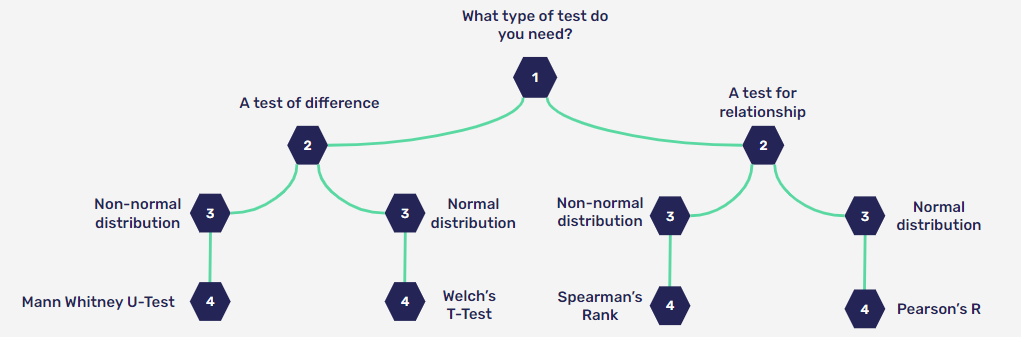

### Imports and load data - (see week 1-3 if stuck)

In [2]:
# imports
import pandas as pd 
# use numpy nulls
import numpy as np
#matplotlib lets us plot graphs 
import matplotlib.pyplot as plt
#seabrn enables pretty graphs
import seaborn as sns

In [3]:
#load in data 
countries = pd.read_csv('../Assets/Data/modelling_countries.csv')
countries.head()

,Unnamed: 0,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Continent_Name,Continent_Code,Two_Letter_Country_Code,Country_Number,cleaned_country,Country,credit rating
0,0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,Asia,AS,AF,4.0,Afghanistan,NaN,NaN
1,1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,Europe,EU,AL,8.0,Albania,Albania,B+
2,2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,Africa,AF,DZ,12.0,Algeria,NaN,NaN
3,3,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,North America,NaN,AG,28.0,Antigua and Barbuda,NaN,NaN
4,4,Argentina,14.5,18.9,8.10,16.0,18700.0,20.90,75.8,2.37,10300.0,South America,SA,AR,32.0,Argentina,Argentina,CCC+


<hr style = "height:5px; background-color: blue; border-color:blue;">
<hr style = "height:5px; background-color: #89CFF0; border-color:#89CFF0;">
<hr style = "height:5px; background-color: black; border-color:black;">

### Hypothesis testing

Using our previous data set some EDA was completed as a result the following plots were produced with corresponding theories...

Our aim is to test them using apropriate hypothesis tests

### The general steps are;

1. Determine the general Hypothesis
2. Pick the appropriate test
3. Check the assumptions
4. Form you mathematical hypothesis pair
5. Run the tests
6. Interpet the p-values


### Theory 1 - Oceania and Europe have significantly lower rates of inflation than the rest of the world.

C:\Users\nick.griffiths.MULTIVLAP1785\AppData\Local\Temp\ipykernel_94708\3669907536.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  inflation = countries.groupby('Continent_Code').mean().sort_values('gdpp')[['inflation']]
C:\Users\nick.griffiths.MULTIVLAP1785\AppData\Local\Temp\ipykernel_94708\3669907536.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=inflation.index, y='inflation', data = inflation, ci=None);


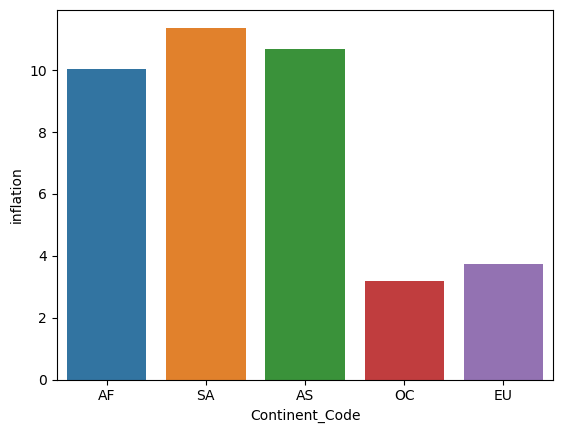

In [4]:
# bar plot Continents VS inflation

inflation = countries.groupby('Continent_Code').mean().sort_values('gdpp')[['inflation']]
#inflation
sns.barplot(x=inflation.index, y='inflation', data = inflation, ci=None);

### Theory 2 - The higher the rate of imports the higher the rate of exports

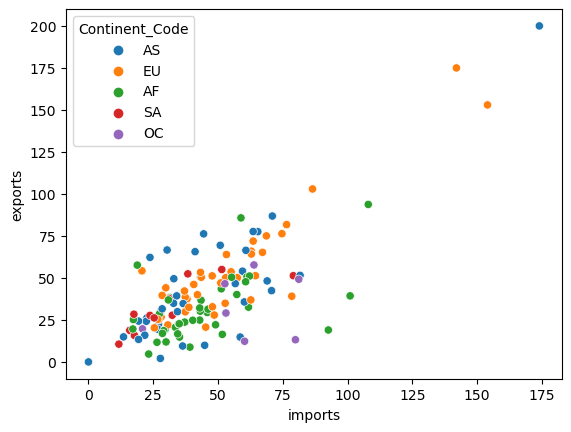

In [5]:
# scatter plot imports VS exports
sns.scatterplot(x='imports', y='exports', data = countries , hue='Continent_Code', );

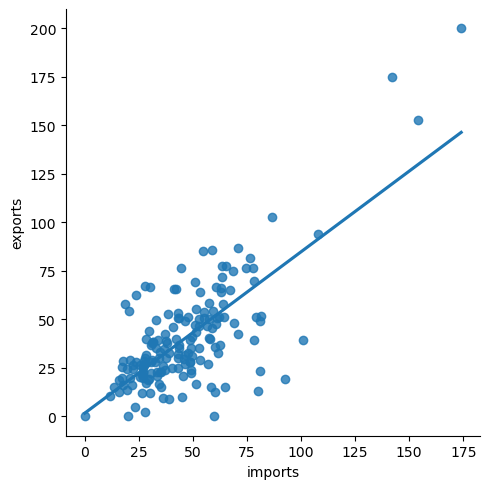

In [6]:
# plot with trend line
sns.lmplot(x='imports', y='exports', data = countries, ci = None);

### Hypothesis testing steps

1. Find appropriate statistical tests and check requirements
2. Formulate Null(H0) and Alternate(H1) hypothesis
3. Set significance(Alpha level)
4. Prepare data and run tests
4. Interpret p-values 
5. Reject or Fail to reject H0

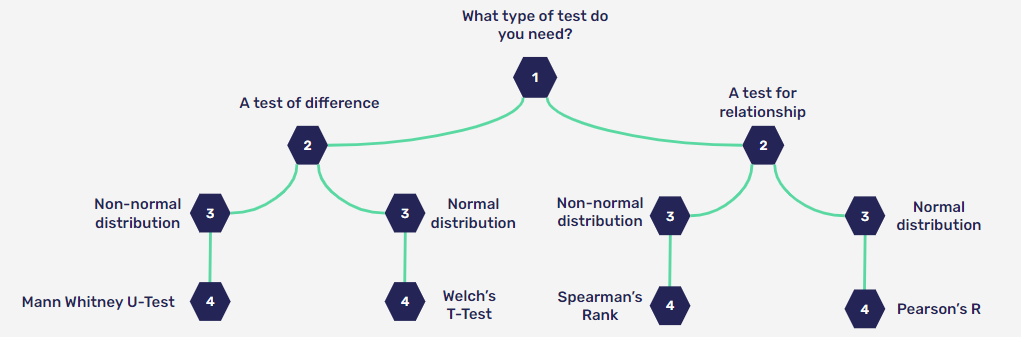

<b> For Theory 1 </b>

To test between group means we could use Mann-Whitney or T-tests... 

which TEST we choose depends on whether or not the data is normally distributed.

So we first need to check if the data is normally distributed.

The first step is always to perform a visual inspection of the data. 

After that we can perform a statistical test to confirm our visual inspection.

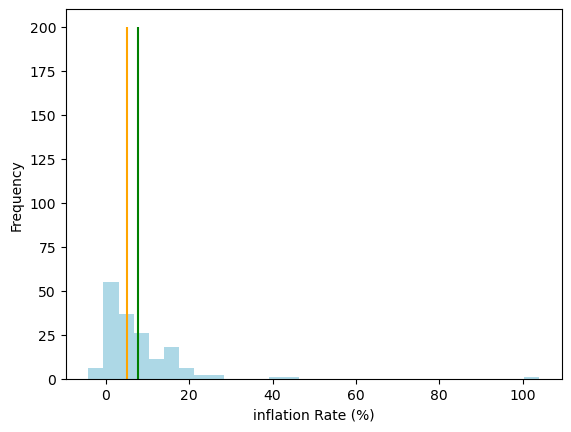

In [7]:
# The first step is always to perform a visual inspection of the data
inflation = countries['inflation']
plt.hist(inflation, color = 'lightblue', bins = 30) # Lightblue to make it easier to see the other colours
plt.vlines(inflation.mean(), ymin=0, ymax=200, color='green', label='mean')
plt.vlines(inflation.median(), ymin=0, ymax=200, color='orange', label='median')
plt.xlabel('inflation Rate (%)')
plt.ylabel('Frequency')
plt.show()

# We can see that this doesn't seem Normally distributed but still best to test

#### Testing for a normal distribution

In [8]:
# Shapiro-Wilk test (for SMALL samples < 500)
# Important note from Renju: My reading on this suggests that this is for SMALL samples < 50 (and not 500)
# If I were doing this, I would take the conservative approach and only use this for samples <50.

# H0 - Data is Normlly distributed
# H1 - Data is not normally distributed

from scipy.stats import shapiro

W, p = shapiro(countries['inflation'])
print(f"Shapiro results with: {p}")


# D'Agostino's K^2 Test General purpose test

# H0 - Data is Normlly distributed
# H1 - Data is not normally distributed

from scipy.stats import normaltest

stat, p = normaltest(countries['inflation'])
print(f"D'Aghostino results with: {p}")

# Note from Renju: You should still perform a visual inspection
#--ALWAYS VISUALISE YOUR DATA--of the data before performing a statistical test
# In the case of a bimodal distribution where mean = median, the test will 
# incorrectly tell you that the data is normally distributed


# both p-values are below 0.05 so reject H0 - data is not Normlally distributed

Shapiro results with: 3.153923094897113e-19
D'Aghostino results with: 1.7830107610763172e-47


#### We can conclude our data is not normally distributed and therefore we use a test appropriate for that Mann-Whitney...

##### To Complete a test of differences (in our case MannWhitney or T-test)

1. Group your data
2. Run tests with appropriate H0 and H1
3. Interpret p-values

##### 1. Group data 

In [9]:
# Mask 1 or 2 will find the EU and OC countries
mask_1 = (countries['Continent_Code'] =='EU')|(countries['Continent_Code'] =='OC')
mask_2 = countries['Continent_Code'].isin(['EU','OC']) 

# Mask 3 finds R.O.W countries
#Tilda means find values that are False (filtering normally finds True)
mask_3 = ~countries['Continent_Code'].isin(['EU','OC'])

# data frame for EU and OC
OC_EU = countries[mask_2]['inflation']

#dataframe for rest of the world
R_O_W = countries[mask_3]['inflation']


##### 2. Run approporiate test with H0 and H1

For Mann-WHitney U-test

__Null__: sample means are the same<br>
__Alternative__: sample means are different

In our case...

__Null__: Inflation  rates are the same <br>
__Alternative__: Inflation rates are different 

In [10]:
from scipy.stats import mannwhitneyu # More false positives than t-test
# Mann-Whitney U test is a non-parametric test for independent samples
# It uses the rank of the data instead of the data itself

# Only use this test if you think that the assumption that the data is normally distributed
# has been severely violated

# H0 - No significant difference in means i.e means are equal
# H1 - Means have a significant difference R_O_W > OC_EU

stat, p = mannwhitneyu(OC_EU,R_O_W, alternative = 'less')
print(p)

# t-test isn't appropriate here but code is included for copy paste/reference

# from scipy.stats import ttest_ind # ind = independent

# stat, p = ttest_ind(OC_EU,R_O_W) 
# # The t statistic is the mean of the difference between the two samples divided by the standard error of the difference
# # You don't need to know this because you care about the p-value
# # (The p-value is calculated from the t statistic but you don't need to do this calculation yourself!)
# print(p)

2.6906270881134534e-06


#### Our p-value is less than 0.05 so we reject the null hypothesis - looks like there is a statistically significant difference in inflation between OC_EU and the rest of the world.

SO what? where's the ROI?

We have found an unbiased insight that suggests 

1. Cash assets outside the OC/EU are Worse investments
2. Bonds in the OC/EU market would be good decisions 

<hr style = "height:5px; background-color: blue; border-color:blue;">
<hr style = "height:5px; background-color: #89CFF0; border-color:#89CFF0;">
<hr style = "height:5px; background-color: black; border-color:black;">

### Now you try
 Using your data or the one we loaded in (or one of the practice sets)

1. Use the testing map to find appropriate tests for Hypothesis 2
2. See if you can apply Hypothesis testing to your own data

In [11]:
# code here

<hr style = "height:5px; background-color: blue; border-color:blue;">
<hr style = "height:5px; background-color: #89CFF0; border-color:#89CFF0;">
<hr style = "height:5px; background-color: black; border-color:black;">


### See you next time


<hr style = "height:5px; background-color: blue; border-color:blue;">
<hr style = "height:5px; background-color: #89CFF0; border-color:#89CFF0;">
<hr style = "height:5px; background-color: black; border-color:black;">